In [2]:
from decimal import *

In [3]:
num_groups = Decimal(2)
num_sources = Decimal(2)
data_sources = [[Decimal(0.4), Decimal(0.6)], [Decimal(0.1), Decimal(0.9)]]
sampling_costs = [Decimal(0.1), Decimal(0.1)]
query_limit = 5000

In [4]:
F = [[None] * query_limit for i in range(query_limit)]

In [5]:
F[0][0] = 0
F[1][0] = sampling_costs[0]/data_sources[0][0]
F[0][1] = sampling_costs[1]/data_sources[1][1]

In [6]:
def compute(F, q1, q2):
    if F[q1][q2] != None:
        result = F[q1][q2]
        F[q1][q2] = result
        return result
    elif q2 == 0:
        result = F[1][0] * q1
        F[q1][q2] = result
        return result
    elif q1 == 0:
        result = F[0][1] * q2
        F[q1][q2] = result
        return result
    else:
        foo = sampling_costs[0] + data_sources[0][0] * compute(F, q1 - 1, q2) + data_sources[0][1] * compute(F, q1, q2 - 1)
        bar = sampling_costs[1] + data_sources[1][0] * compute(F, q1 - 1, q2) + data_sources[1][1] * compute(F, q1, q2 - 1)
        result = min(foo, bar)
        F[q1][q2] = result
        return result

In [7]:
for x in range(query_limit):
    for y in range(query_limit):
        compute(F, x, y)

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame(F)

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,0.1111111111111111145377253846,0.2222222222222222290754507692,0.3333333333333333436131761538,0.4444444444444444581509015384,0.5555555555555555726886269230,0.6666666666666666872263523076,0.7777777777777778017640776922,0.8888888888888889163018030768,1.000000000000000030839528461,...,554.4444444444444615432496692,554.5555555555555726577873945,554.6666666666666837723251199,554.7777777777777948868628453,554.8888888888889060014005707,555.0000000000000171159382961,555.1111111111111282304760215,555.2222222222222393450137468,555.3333333333333504595514722,555.4444444444444615740891976
1,0.25,0.2944444444444444482822524308,0.3655555555555555645469914093,0.4526666666666666810091033699,0.5493777777777777972343677519,0.6499955555555555956134988004,0.7516626666666667284594433233,0.8542741777777778623488198537,0.9577356488888889971982550833,1.061962084000000132930616045,...,554.4444444444446151549409372,554.5555555555557263003181910,554.6666666666668374456954448,554.7777777777779485910726986,554.8888888888890597364499525,555.0000000000001708818272064,555.1111111111112820272044603,555.2222222222223931725817142,555.3333333333335043179589681,555.4444444444446154633362220
2,0.50,0.5177777777777777802997658830,0.5568888888888888961697588972,0.6152000000000000133424135936,0.6888711111111111309887634472,0.7733208888888889215265619741,0.8646576000000000493699204972,0.9605042311111111798820370744,1.059396798222222312298164526,1.159653326800000129330932938,...,554.4444444444447684890764492,554.5555555555558796652932315,554.6666666666669908415100138,554.7777777777781020177267961,554.8888888888892131939435784,555.0000000000003243701603607,555.1111111111114355463771430,555.2222222222225467225939253,555.3333333333336578988107077,555.4444444444447690750274900
3,0.75,0.7571111111111111125146523175,0.7770222222222222270819836494,0.8122933333333333435440956100,0.8629244444444444613325540108,0.9270830222222222489716737099,1.002112853333333373295964726,1.085469404444444500557611780,1.175040361955555630226019847,1.268885547893333435077439392,...,554.4444444444449215456562050,554.5555555555560327527125158,554.6666666666671439597688266,554.7777777777782551668251373,554.8888888888893663738814481,555.0000000000004775809377589,555.1111111111115887879940696,555.2222222222226999950503804,555.3333333333338112021066912,555.4444444444449224091630020
4,1.00,1.002844444444444445163759313,1.012515555555555558467903559,1.032426666666666673603669079,1.064625777777777790482632778,1.109608675555555576375301592,1.166610346666666698307795231,1.234153969777777822957146128,1.310508526648888950103224969,1.393859335146666748719810074,...,554.4444444444450743246802049,554.5555555555561855625760442,554.6666666666672968004718834,554.7777777777784080383677226,554.8888888888895192762635618,555.0000000000006305141594010,555.1111111111117417520552402,555.2222222222228529899510794,555.3333333333339642278469187,555.4444444444450754657427579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1248.75,1248.750000000000000000000000,1248.750000000000000000000000,1248.750000000000000000000000,1248.750000000000000000000000,1248.750000000000000000000000,1248.750000000000000000000000,1248.750000000000000000000000,1248.750000000000000000000000,1248.750000000000000000000000,...,1248.750000000000000000000000,1248.750000000000000000000000,1248.750000000000000000000000,1248.750000000000000000000000,1248.750000000000000000000000,1248.750000000000000000000000,1248.750000000000000000000000,1248.750000000000000000000000,1248.750000000000000000000000,1248.750000000000000000000000
4996,1249.00,1249.000000000000000000000000,1249.000000000000000000000000,1249.000000000000000000000000,1249.000000000000000000000000,1249.000000000000000000000000,1249.000000000000000000000000,1249.000000000000000000000000,1249.000000000000000000000000,1249.000000000000000000000000,...,1249.000000000000000000000000,124

In [11]:
X = range(1, query_limit)
Y = []
for q in X:
    min_value = float('inf')
    min_x = -1
    for x in range(q):
        y = q - x
        val = F[x][y]
        if val < min_value:
            min_value = val
            min_x = x
    Y.append(min_x / q)

In [12]:
import matplotlib.pyplot as plt

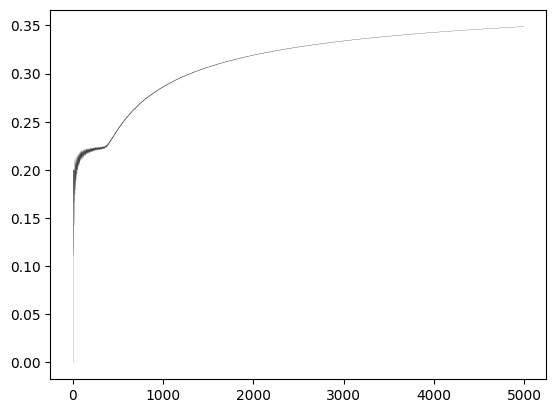

In [20]:
plt.plot(X, Y, linewidth=0.2, color="black")

KeyboardInterrupt: 

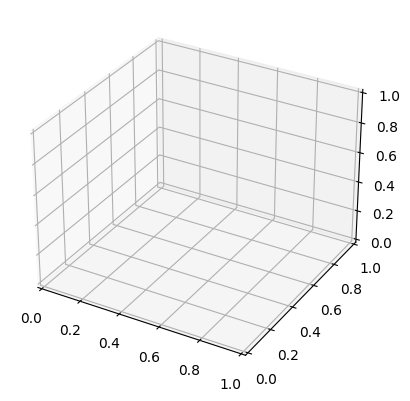

In [21]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

x = range(query_limit)
y = range(query_limit)
X, Y = numpy.meshgrid(x, y)
surf = ha.plot_surface(X, Y, numpy.array(F), cmap=cm.Spectral)

ha.view_init(30, 225)